In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

In [2]:
data = pd.read_csv("A_Z_Handwritten_Data[1].csv")

In [3]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


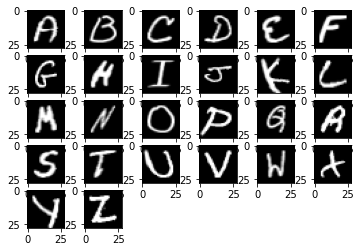

In [4]:
for i in range(26):
    dd = data[data['0']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    im = plt.subplot(5, 6, i+1)
    im.imshow(x, cmap='gray')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data.drop('0',axis = 1) 
y = data['0']

In [7]:
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28))

In [11]:
X_train.shape

(297960, 28, 28)

In [12]:
X_test.shape

(74490, 28, 28)

In [13]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [14]:
word_dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

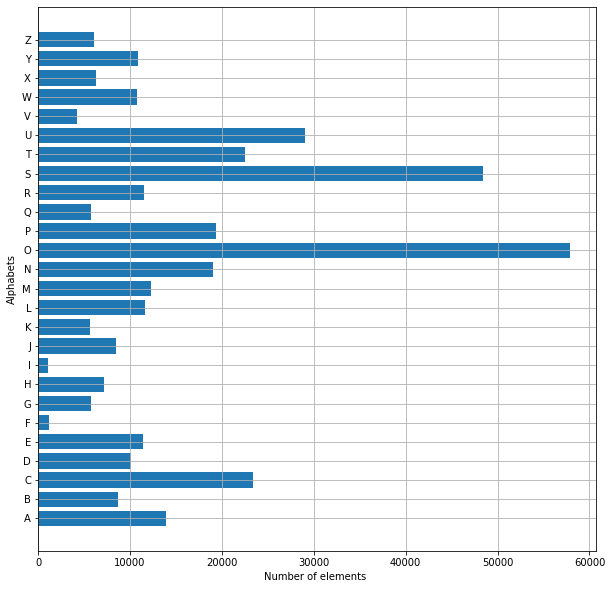

In [15]:
y_int = np.int0(y) 
count = np.zeros(26, dtype='int') 
for i in y_int:
    count[i] +=1 

alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

In [17]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print(X_train.shape)

(297960, 28, 28, 1)


In [18]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_test.shape)

(74490, 28, 28, 1)


In [19]:
train_yOHE = to_categorical(Y_train, num_classes = 26, dtype='int')

In [20]:
test_yOHE = to_categorical(Y_test, num_classes = 26, dtype='int')

In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [22]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, train_yOHE, epochs=1,  validation_data = (X_test,test_yOHE))

9312/9312 [==============================] - 423s 45ms/step - loss: 0.1697 - accuracy: 0.9544 - val_loss: 0.0890 - val_accuracy: 0.9759


In [23]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.975902795791626]
The training accuracy is : [0.9544133543968201]
The validation loss is : [0.08898834139108658]
The training loss is : [0.16965192556381226]


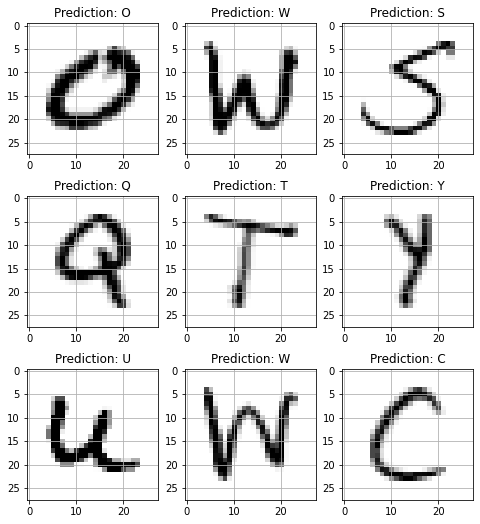

In [24]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [25]:
import pickle

In [27]:
pickle.dump(model,open('model1.pkl','wb'))

In [28]:
from tensorflow.keras.models import load_model

In [29]:
import os

In [32]:
model.save(os.path.join('PycharmProjects','alphabetclassifier.h5'))

In [33]:
new_model=load_model(os.path.join('AML','alphabetclassifier.h5'))